In [273]:
import sys
sys.path.append('/home/jovyan/home/')
from Basics import *
setplot(dark=True)

In [274]:
from illstack_CAMELS.CAMELS_example import profiles_expand_new

Profiles, the folders are 1_n1 style, files are {suite}_{suiteset}_{sim}_{z} in the normal sim number style, with redshifts using numbers from 34 snapshots

New 1P sims, folders 1_n1, files snapshot_{z} where z uses numbers from 91 snapshots (even tho there are only 34)

Old 1P sims, the folders are both 1_n1 and normal style, where in the normal style files are snap_0{z} out of 34 numbers for both

# Open and plot Profiles

In [279]:
data = [f"{i//11 + 1}_{'n' + str(5 - (i % 11)) if i % 11 < 5 else str(i % 11 - 5)}" for i in range(66)]

df = pd.DataFrame(data, columns=["Value"])
pd.set_option("display.max_rows", None)

sims=np.arange(0, 66, 1)

simfor = []
for sim in sims:
    if sim%11-5<0: 
        subfolder = f'{(np.ceil(sim/10+0.1)):.0f}_n{np.abs(sim%11-5)}'
    else: 
        subfolder = f'{(np.ceil(sim/11)):.0f}_{sim%11-5}'
    simfor.append(subfolder)    

df['Attempt'] = np.array(simfor)
display(df)

,Value,Attempt
0,1_n5,1_n5
1,1_n4,1_n4
2,1_n3,1_n3
3,1_n2,1_n2
4,1_n1,1_n1
5,1_0,1_0
6,1_1,1_1
7,1_2,1_2
8,1_3,1_3
9,1_4,1_4


In [ ]:
def rsim_rstack(rsim): return (rsim*r_sim.unit/(1+z)*(cosmou.littleh/h)).to(u.Mpc).value
def rstack_rsim(rstack): return (rstack*u.Mpc*(1+z)/(cosmou.littleh/h)).to(r_sim.unit).value

def pthsim_pthstack(pthsim): return (pthsim*pth_sim.unit/(cosmou.littleh/h)**2*(1+z)**3).to(u.dyne/u.cm**2).value
def pthstack_pthsim(pthstack): return (pthstack*(u.dyne/u.cm**2)*(cosmou.littleh/h)**2/(1+z)**3).to(pth_sim.unit).value

cmap = plt.get_cmap('coolwarm')  # Choose a colormap
norm = mpl.colors.Normalize(vmin=np.log10(np.percentile(m_sim*(cosmou.littleh/h), 2.5).value), vmax=np.log10(np.percentile(m_sim*(cosmou.littleh/h), 97.5).value))

def fancyticks(ax, z h):
    ax.tick_params(top=False, right=False, which='both')
    ax.set(title=f"CAMELS Halo Profiles \n {suite} {sset} {sim} $z={z:.2f}$", xlabel=r'$r \ [\text{Mpc}]$', ylabel=r'$P_\text{th} \ [\frac{\text{dyne}}{\text{cm}^{2}}$]', xscale='log', yscale='log')
    
    ax2x = ax.secondary_xaxis('top', functions=(rstack_rsim, rsim_rstack))
    ax2x.set_xlabel(xlabel=r'$r \ [\text{ckpc}/h]$', labelpad=10, size=20)

    ax2y = ax.secondary_yaxis('right', functions=(pthstack_pthsim, pthsim_pthstack))
    ax2y.set_ylabel(ylabel=r'$P_\text{th} \ [\frac{M_\odot \text{km}^2 h^2}{\text{ckpc}^{3} s^{2}}]$', labelpad=10, size=20)

    cax = inset_axes(ax, width="40%", height="5%", loc="lower left", borderpad=2)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal')
    cax.set_title(r'$\log M_{200, c} \ [M_\odot] $', fontsize=15)

    return fig, ax

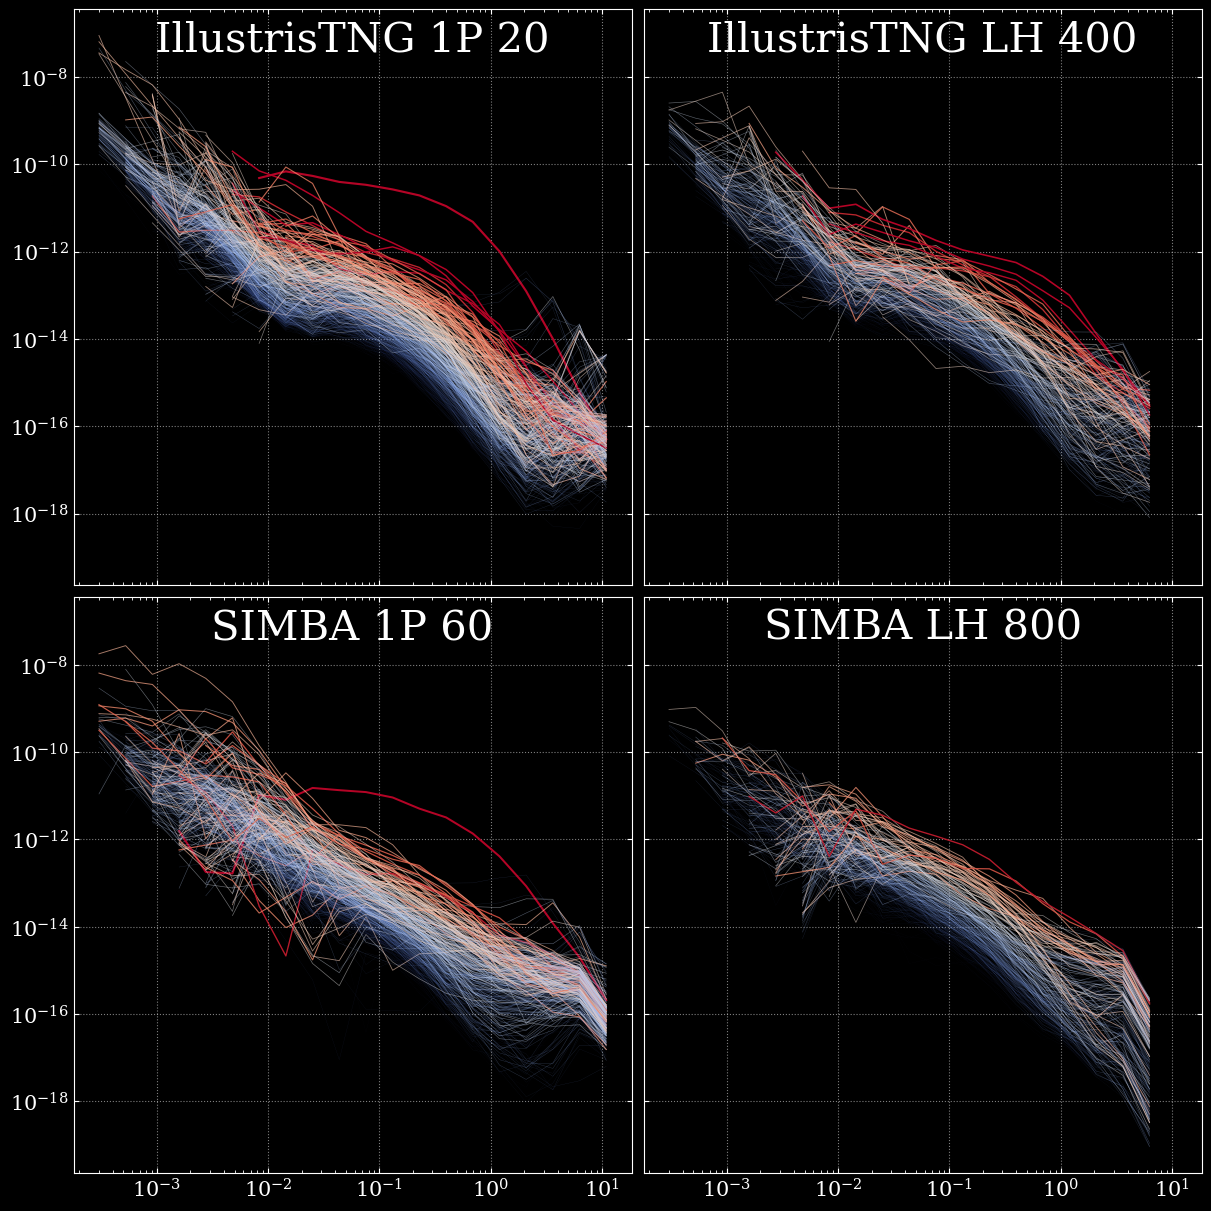

In [278]:
fig, axs = plt.subplots(2,2, figsize=(12, 12), layout='constrained', sharex=True, sharey=True)

for j in range(4):
    suite, subset, sim = ['IllustrisTNG', 'IllustrisTNG', 'SIMBA', 'SIMBA'][j], ['1P', 'LH', '1P', 'LH'][j], [20, 400, 60, 800][j]
    # Cut sims, showing that they don't reach the same radii 
    # suite, subset, sim = ['IllustrisTNG', 'IllustrisTNG', 'IllustrisTNG', 'IllustrisTNG'][j], ['LH', 'LH', 'LH', 'LH'][j], [138, 344, 743, 948][j]
    r, valprofiles, haloprops, simparams = profiles_expand_new.extract_old(suite, subset, sim, snap=24)
    pres, mh, rh = valprofiles['pres'], haloprops['Group_M_Crit200'], haloprops['Group_R_Crit200']

    ax = axs.flatten()[j]
    cmap, norm = plt.get_cmap('coolwarm'), mpl.colors.LogNorm(vmin=1e11, vmax=1e13)
    for i in range(pres.shape[0]):
        ax.loglog(r[pres[i]!=0], pres[i][pres[i]!=0]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), c=cmap(norm(mh[i])), lw=norm(mh[i]), alpha=np.min([norm(mh[i]), 1]))
        ax.set_title(f'{suite} {subset} {sim}', y=1, pad=-30)

# Add cuts

In [1937]:
def cut(r, profs, haloprops, mh, mh_low=0, mh_high=np.inf, inner_cut=0, outer_cut=np.inf):
    mcut = (mh > mh_low) & (mh < mh_high)
    rcut = (r <= outer_cut) & (r >= inner_cut) & (np.sum(profs['nparticles'][mcut], axis=0)!=0)
    cutprofs = {prof: profs[prof][mcut, :][:, rcut] for prof in profs.keys()}
    cutprops = {prop: haloprops[prop][mcut] for prop in haloprops.keys()}
    return r[rcut], cutprofs, cutprops

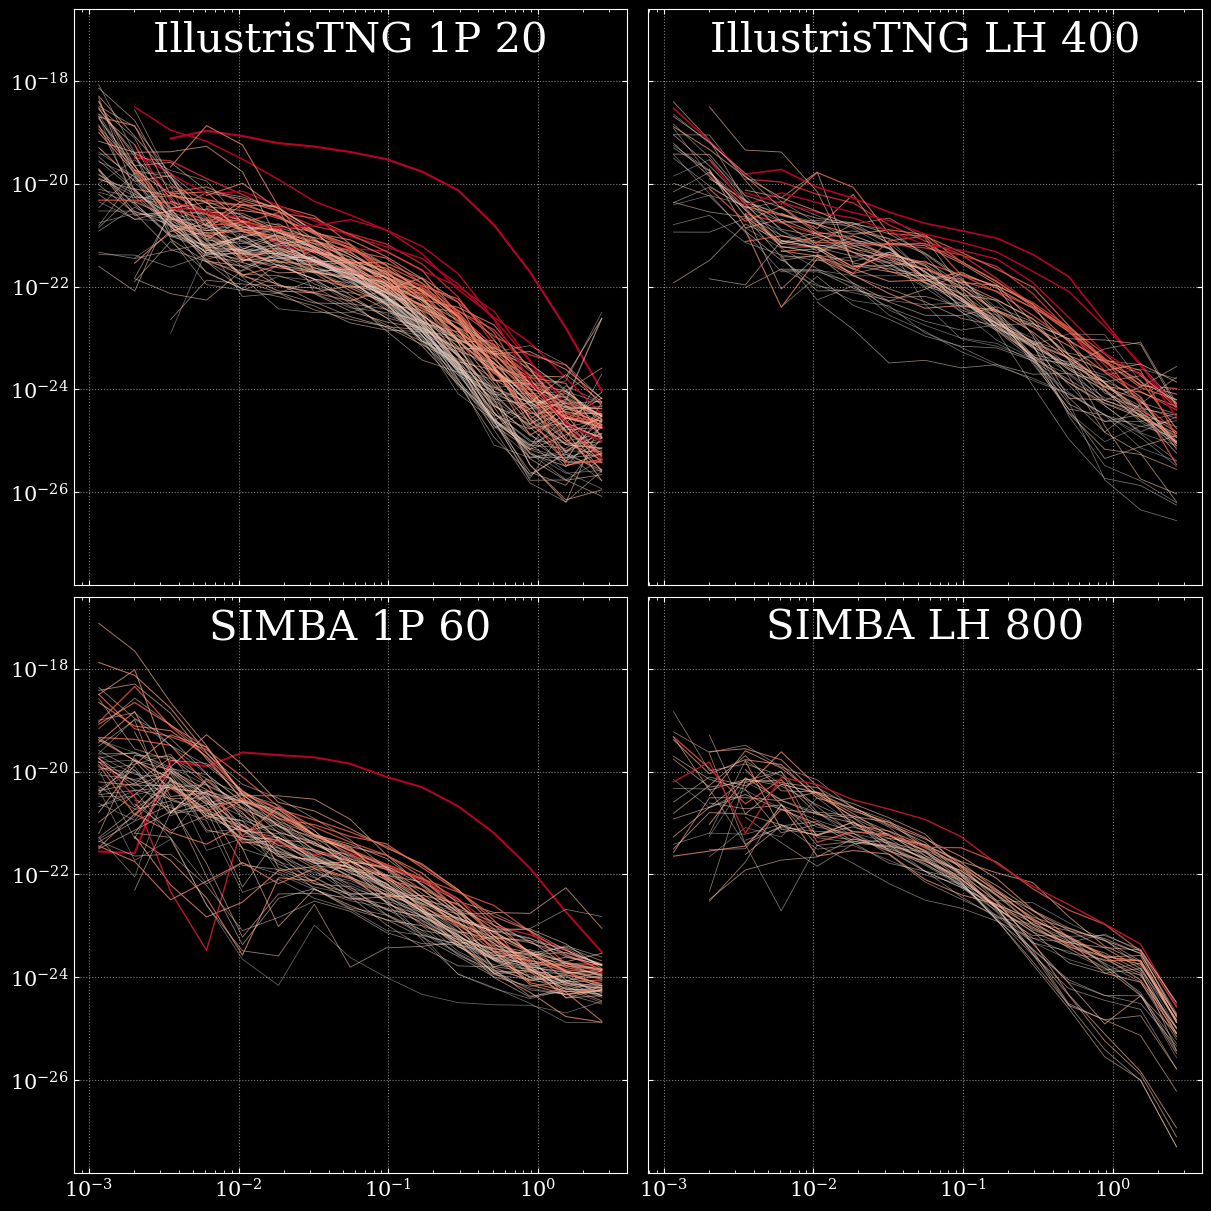

In [1938]:
fig, axs = plt.subplots(2,2, figsize=(12, 12), layout='constrained', sharex=True, sharey=True)

for j in range(4):
    suite, subset, sim = ['IllustrisTNG', 'IllustrisTNG', 'SIMBA', 'SIMBA'][j], ['1P', 'LH', '1P', 'LH'][j], [20, 400, 60, 800][j]
    r, valprofiles, haloprops, simparams = extract(suite, subset, sim, snap=24)
    rcut, profscut, propscut = cut(r, valprofiles, haloprops, haloprops['Group_M_Crit200'], mh_low=10**12, inner_cut=1e-3, outer_cut=3)

    prescut, mh, rh = profscut['pres'], propscut['Group_M_Crit200'], propscut['Group_R_Crit200']

    ax = axs.flatten()[j]
    cmap, norm = plt.get_cmap('coolwarm'), mpl.colors.LogNorm(vmin=1e11, vmax=1e13)
    for i in range(prescut.shape[0]):
        ax.loglog(rcut[prescut[i]!=0], prescut[i][prescut[i]!=0], c=cmap(norm(mh[i])), lw=norm(mh[i]), alpha=np.min([norm(mh[i]), 1]))
        ax.set_title(f'{suite} {subset} {sim}', y=1, pad=-30)

# Weight by distribution

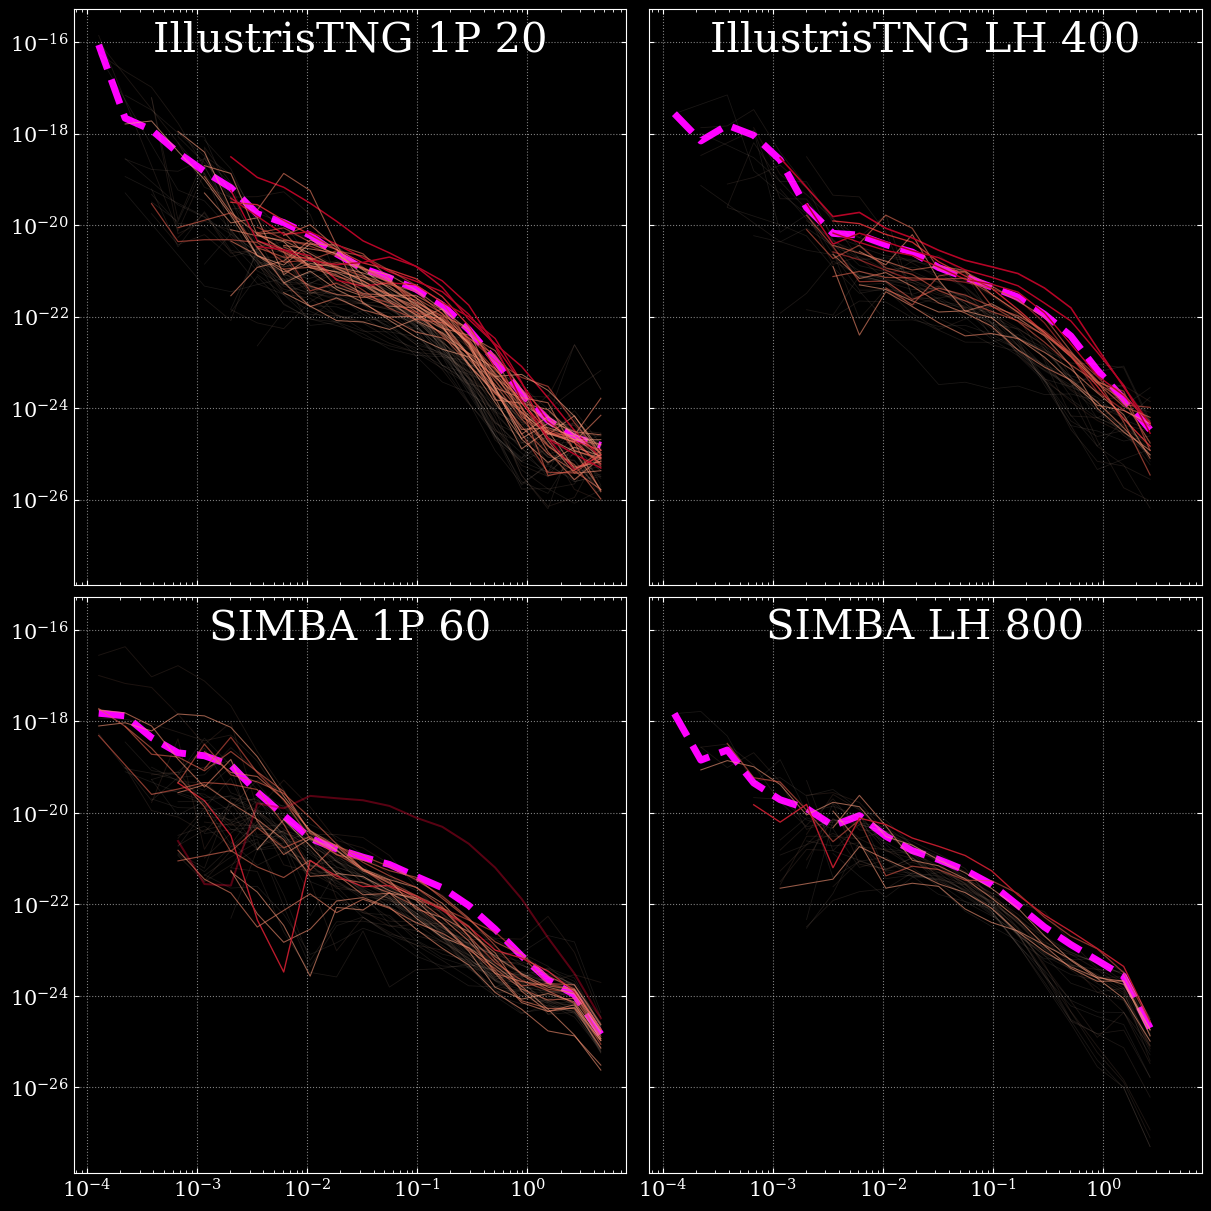

In [1420]:
fig, axs = plt.subplots(2,2, figsize=(12, 12), layout='constrained', sharex=True, sharey=True)


b_edges=np.array([12.11179316,12.46636941,12.91135125,13.42362312,13.98474899])
p=np.array([4.13431979e-03, 1.31666601e-01, 3.36540698e-01, 8.13760167e-02])

for j in range(4):
    suite, subset, sim = ['IllustrisTNG', 'IllustrisTNG', 'SIMBA', 'SIMBA'][j], ['1P', 'LH', '1P', 'LH'][j], [20, 400, 60, 800][j]
    r, valprofiles, haloprops, simparams = extract(suite, subset, sim, snap=24)
    rcut, profscut, propscut = cut(r, valprofiles, haloprops, haloprops['Group_M_Crit200'], mh_low=10**b_edges[0], mh_high=10**b_edges[-1])
    
    prescut, mh, rh = profscut['pres'], propscut['Group_M_Crit200'], propscut['Group_R_Crit200']
    
    ws = p[np.searchsorted(b_edges, np.log10(mh))-1]
    pres_w=np.apply_along_axis(lambda v: np.average(v[np.nonzero(v)],weights=ws[np.nonzero(v)]),0,prescut)

    ax = axs.flatten()[j]
    ax.loglog(rcut, pres_w, ls='--', color='magenta', lw=5)
    cmap, norm = plt.get_cmap('coolwarm'), mpl.colors.LogNorm(vmin=1e11, vmax=1e13)
    for i in range(prescut.shape[0]):
        ax.loglog(rcut[prescut[i]!=0], prescut[i][prescut[i]!=0], c=cmap(norm(mh[i])), lw=norm(mh[i]), alpha=(ws[i]/np.max(ws))**0.5)
        ax.set_title(f'{suite} {subset} {sim}', y=1, pad=-30)

# Save in file

In [ ]:
# file_hdf5=h5py.File(f"{save_direct}/{suite}_{subset}_{sim}_{snap}.hdf5",'w',track_order=True)
for prof in profs.keys():
    file_hdf5.create_group(prof)
    file_hdf5.create_dataset(f'{prof}/Mean', data=np.apply_along_axis(lambda v: np.mean(v[np.nonzero(v)]), 0, profs[prof]), dtype='float64')
    file_hdf5.create_dataset(f'{prof}/STD', data=np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]), 0, profs[prof]), dtype='float64')
    file_hdf5.create_dataset(f'{prof}/P50', data=np.apply_along_axis(lambda v: np.percentile(v[np.nonzero(v)],50), 0, profs[prof]), dtype='float64')
    file_hdf5.create_dataset(f'{prof}/P16', data=np.apply_along_axis(lambda v: np.percentile(v[np.nonzero(v)],16), 0, profs[prof]), dtype='float64')
    file_hdf5.create_dataset(f'{prof}/P80', data=np.apply_along_axis(lambda v: np.percentile(v[np.nonzero(v)],84), 0, profs[prof]), dtype='float64')

In [1683]:
%time
ws = p[np.searchsorted(b_edges, np.log10(mh))-1]

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


In [ ]:
np.apply_along_axis(lambda v: np.average(v[np.nonzero(v)]), 0, profscut['pres'])

In [1403]:
b_edges=np.array([12.11179316,12.46636941,12.91135125,13.42362312,13.98474899])
p=np.array([4.13431979e-03, 1.31666601e-01, 3.36540698e-01, 8.13760167e-02])

r, valprofiles, haloprops, simparams = extract('IllustrisTNG', 'LH', 200, snap=24)
rcut, profscut, propscut = cut(r, valprofiles, haloprops, haloprops['Group_M_Crit200'], mh_low=10**b_edges[0], mh_high=10**b_edges[-1])
prescut, mh, rh = profscut['pres'], propscut['Group_M_Crit200'], propscut['Group_R_Crit200']

ws = p[np.searchsorted(b_edges, np.log10(mh))-1]
pres_w=np.apply_along_axis(lambda v: np.average(v[np.nonzero(v)],weights=ws[np.nonzero(v)]),0,prescut)

In [1404]:
pres_w

array([9.22503073e-20, 3.41088263e-19, 1.34292591e-19, 1.35215007e-20,
       2.10051834e-21, 1.68426958e-21, 9.07503332e-22, 6.76965068e-22,
       5.22676346e-22, 4.58874803e-22, 5.18290947e-22, 4.07585876e-22,
       1.49179535e-22, 3.33979777e-23, 4.44903517e-24, 5.78037614e-25,
       1.52365756e-25])

In [ ]:
pres_w=np.apply_along_axis(lambda v: np.average(v[np.nonzero(v)],weights=w[np.nonzero(v)]),0,val_pres)

In [1379]:
np.concatenate([[0], p, [0]])

array([0.        , 0.00413432, 0.1316666 , 0.3365407 , 0.08137602,
       0.        ])

In [1373]:
np.searchsorted([1, 2, 3, 4], [0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

array([0, 1, 2, 3, 4, 4])

# Fitting off 1halo term

In [1996]:
r, valprofiles, haloprops, simparams = extract('IllustrisTNG', 'LH', 200, snap=24)
pres, mh, rh = valprofiles['pres'], haloprops['Group_M_Crit200'], haloprops['Group_R_Crit200']

i = 38
print(np.log10(mh[i]))

rcut, profscut, propscut = cut(r, valprofiles, haloprops, haloprops['Group_M_Crit200'], mh_low = 0.1*mh[i], mh_high = 1.9*mh[i])
# prescut, mh, rh = profscut['pres'], propscut['Group_M_Crit200'], propscut['Group_R_Crit200']
r, pres = r[np.isin(r, rcut)], pres[:, np.isin(r, rcut)]

std = np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]), 0, profscut['pres'])
poi = np.sqrt(np.apply_along_axis(lambda v: np.sum(v[~np.isnan(v)]), 0, (profscut['pres'])**2/profscut['nparticles'])/profscut['nparticles'].shape[0])
err = np.sqrt(poi**2+std**2)

12.02055022734264


/tmp/ipykernel_59/2592420620.py:12: RuntimeWarning: invalid value encountered in divide
  poi = np.sqrt(np.apply_along_axis(lambda v: np.sum(v[~np.isnan(v)]), 0, (profscut['pres'])**2/profscut['nparticles'])/profscut['nparticles'].shape[0])


In [1985]:
poi/std

array([1.06264302, 0.93611021, 0.41117364, 0.79712288, 0.30297454,
       0.10980719, 0.21617452, 0.08481928, 0.08673922, 0.11376097,
       0.08521728, 0.05625031, 0.03249437, 0.01951262, 0.01348528,
       0.006952  , 0.00236545, 0.00153648, 0.00131121])

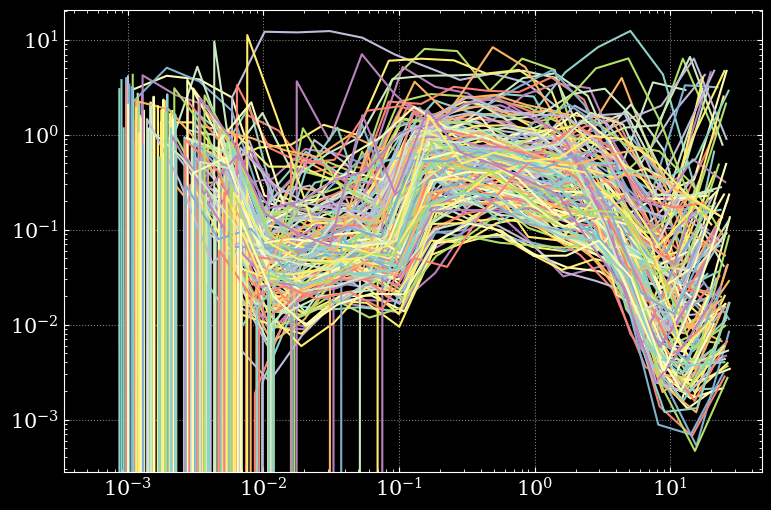

In [1991]:
for j in range(profscut['pres'].shape[0]):
    plt.loglog(r/propscut['Group_R_Crit200'][j], profscut['pres'][j]/std)
# plt.loglog(r, std)

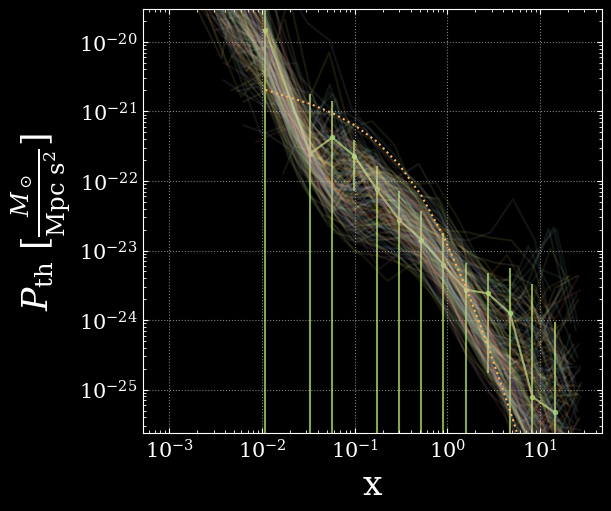

In [1997]:
z, Omegam, Omegab = simparams['Redshift'], simparams['Omega0'], simparams['OmegaBaryon']
rhocrit = (3/(8*np.pi*c.G)) * ((100*h*u.km/u.s/u.Mpc)**2*(OmegaM*(1+z)**3+OmegaL))
p200_some = (c.G*u.Msun*200*rhocrit/(2*u.Mpc)).to(u.Msun/u.Mpc/u.s**2).value

P00 = 18.1 * (mh/10**14)**0.154 * (1+z)**-0.758
xc0 = 0.497 * (mh/10**14)**-0.00865 * (1+z)**0.731
beta0 = 4.35 * (mh/10**14)**0.0393 * (1+z)**0.415


def func(x, P0, xc, beta):
    gamma, alpha=-0.3, 1
    return Omegab/Omegam * p200_some*(mh[i]/rh[i]) * P0 * (x/xc)**gamma * (1+(x/xc)**alpha)**-beta

fig, ax = plt.subplots(1,1, figsize=(6, 5), layout='constrained')
ax.set(ylim=(0.5*np.min(pres[i][pres[i]!=0]), 2*np.max(pres[i][pres[i]!=0])), xscale='log', yscale='log',
      xlabel=r'x', ylabel=r'$P_\text{th} \ [\frac{M_\odot}{\text{Mpc s}^2}]$')

for j in range(propscut['Group_R_Crit200'].size):
    ax.plot(r[profscut['nparticles'][j]!=0]/propscut['Group_R_Crit200'][j], profscut['pres'][j, profscut['nparticles'][j]!=0], alpha=0.1)
ax.plot(r[pres[i]!=0]/rh[i], func(r[pres[i]!=0]/rh[i], P00[i], xc0[i], beta0[i]), ls=':', label='Guess GNFW')
ax.errorbar(r[pres[i]!=0]/rh[i], pres[i][pres[i]!=0], yerr=err[pres[i]!=0], marker='.',label='poisson errors', alpha=0.75, zorder=0)

plt.show()

In [1993]:
np.gradient(np.gradient(np.gradient(pres[i][idx], r[idx]), r[idx]), r[idx])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 18

/tmp/ipykernel_59/2657055082.py:12: RuntimeWarning: invalid value encountered in power
  return Omegab/Omegam * p200_some*(mh[i]/rh[i]) * P0 * (x/xc)**gamma * (1+(x/xc)**alpha)**-beta


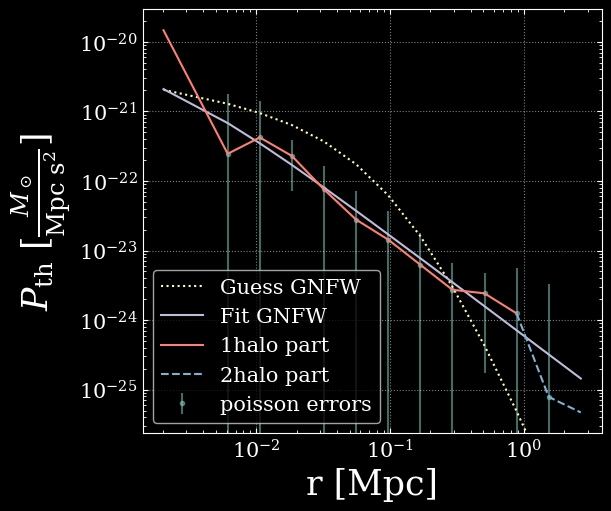

In [2000]:
idx = (pres[i]!=0)
# idx2 = (idx)
idx2 = (idx) & (r/rh[i] >2e-2) & (r/rh[i] <10)

popt, pcov = scipy.optimize.curve_fit(func, xdata=r[idx2]/rh[i], ydata=pres[i][idx2], 
                          sigma=err[idx2], p0=[P00[i], xc0[i], beta0[i]])
mse =  ((func(r[idx]/rh[i], *popt)-pres[i][idx])/pres[i][idx])

idx3, idx4 = r[idx] <= r[idx][mse<5e-1][-1], r[idx] >= r[idx][mse<5e-1][-1]

fig, ax = plt.subplots(1,1, figsize=(6, 5), layout='constrained')
ax.set(ylim=(0.5*np.min(pres[i][idx]), 2*np.max(pres[i][idx])), xscale='log', yscale='log',
      xlabel=r'r [Mpc]', ylabel=r'$P_\text{th} \ [\frac{M_\odot}{\text{Mpc s}^2}]$')

ax.errorbar(r[idx2], pres[i][idx2], yerr=err[idx2], marker='.',label='poisson errors', ls='', alpha=0.5, zorder=0)
ax.plot(r[pres[i]!=0], func(r[pres[i]!=0]/rh[i], P00[i], xc0[i], beta0[i]), ls=':', label='Guess GNFW')

ax.plot(r[idx], func(r[idx]/rh[i], *popt), label='Fit GNFW')
ax.plot(r[idx][idx3], pres[i][idx][idx3], label='1halo part')
ax.plot(r[idx][idx4], pres[i][idx][idx4], ls='--', label='2halo part')

plt.legend(); plt.show()

In [ ]:
i=22
print(np.log10(mh[i]))
idx = (prescut[i]!=0)
idx2 = (idx) & (rcut/rh[i] <1)

def func(x, P0, xc, beta):
    gamma, alpha=-0.3, 1
    return p200_some*(mh[i]/rh[i]) * P0 * (x/xc)**gamma * (1+(x/xc)**alpha)**-beta

fig, ax = plt.subplots(1,1, figsize=(6, 5), layout='constrained')
ax.set(ylim=(0.5*np.min(prescut[i][idx]), 1.5*np.max(prescut[i][idx])), xscale='log', yscale='log',
      xlabel=r'r [Mpc]', ylabel=r'$P_\text{th} \ [\frac{M_\odot}{\text{Mpc s}^2}]$')

ax.errorbar(rcut[idx], prescut[i][idx], yerr=prescut[i][idx] / np.sqrt(profscut['nparticles'][i, idx]), ls='', label='poisson errors')
ax.plot(rcut[idx], func(rcut[idx]/rh[i], P00[i], xc0[i], beta0[i]), ls=':', label='Guess GNFW')
ax.axvline(rh[i], ls='--', label='Max $r$ of fit')

popt, pcov = scipy.optimize.curve_fit(func, xdata=rcut[idx2]/rh[i], ydata=prescut[i][idx2], 
                          sigma=prescut[i][idx2] / np.sqrt(profscut['nparticles'][i, idx2]), p0=[P00[i], xc0[i], beta0[i]])
mse =  ((func(rcut[idx]/rh[i], *popt)-prescut[i][idx])/(prescut[i][idx] / np.sqrt(profscut['nparticles'][i, idx])))**2

idx3, idx4 = rcut[idx] <= rcut[idx][mse<1e4][-1], rcut[idx] >= rcut[idx][mse<1e4][-1]

ax.plot(rcut[idx], func(rcut[idx]/rh[i], *popt), label='Fit GNFW')
ax.plot(rcut[idx][idx3], prescut[i][idx][idx3], label='1halo part')
ax.plot(rcut[idx][idx4], prescut[i][idx][idx4], ls='--', label='2halo part')

plt.legend(); plt.show()

In [ ]:
def build_emulator_3D(home,suite,prof,func_str):
    z=choose_redshift(suite)
    #these lines need to be adjusted if you have more than one redshift
    #but this will make the github version work for the currently uploaded profiles
    z=np.array([z[-1]])
    Sim_name, OmegaM, sigma8, ASN1, AAGN1, ASN2, AAGN2 = set_suite(suite, home)
    nums_tot=np.linspace(0,999,1000,dtype='int')

    #remove some sims for radial limits
    if suite == 'SIMBA':
        nums_remove = np.array([5,6,16,37,77,90,95,103,127,133,149,156,161,166,168,179,184,222,234,241,257,267,270,295,303,311,313,322,324,325,356,385,389,418,430,460,492,500,522,531,605,615,616,622,625,629,647,659,678,680,692,723,735,742,766,776,779,783,802,811,830,834,880,897,930,936,943,958,970,977])
    if suite == 'IllustrisTNG':
        nums_remove = np.array([43, 51, 75, 102, 111, 122, 123, 138, 145, 183, 207, 225, 233, 263, 298, 344, 372, 397, 439, 449, 453, 477, 484, 492, 505, 512, 539, 577, 584, 607, 611, 617, 646, 661, 675,713, 719, 726, 728, 743, 800, 801, 837, 841, 888, 898, 914, 921, 942, 948, 964])

    nums = [n for n in nums_tot if n not in nums_remove]
    sims=['LH_'+str(i) for i in nums]
    params = np.vstack([OmegaM,sigma8,ASN1,AAGN1,ASN2,AAGN2]).T
    samples=LH_cartesian_prod(params,z,mass)
    nsamp=samples.shape[0]

    usecols=usecols_dict[prof]
    x,y=load_profiles_3D(usecols,home,suite,sims,snap,mass_str,prof)
    y=np.transpose(y)
    
    emulator=ostrich.emulate.PcaEmulator.create_from_data(
        samples,
        y,
        ostrich.interpolate.RbfInterpolator,
        interpolator_kwargs={'function':func_str},
        num_components=12)
    return samples,x,y,emulator